# Analysis of annealing results for instances with maximum departure delay for precalculation of 12 minutes #

In [64]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import polynomial
import h5py
import seaborn
import matplotlib.backends.backend_pdf

## Inventory ##

In [65]:
d = pd.read_hdf('../data/connectedComponents/maxDelayPrecalc012/inventory.h5')
d.head()

,NLogQubits,NPhysQubits,SuccessProbability,embedding,energy,exact,isValid,maxCoefficientRangeRatio,maxCoefficientRangeRatioEmbedded,penalty_weight_conflict,penalty_weight_unique,repeatTo99,version
instance,,,,,,,,,,,,,
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep002_maxDelay012.h5,14,NaN,NaN,NaN,0.0,True,1.0,3.0,NaN,0.5,0.5,NaN,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep002_maxDelay012.h5,14,55.0,0.0438,0.0,0.0,False,1.0,3.0,16.0,0.5,0.5,102.8211,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep002_maxDelay012.h5,14,53.0,0.0438,1.0,0.0,False,1.0,3.0,16.0,0.5,0.5,102.8211,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep002_maxDelay012.h5,14,53.0,0.0438,2.0,0.0,False,1.0,3.0,16.0,0.5,0.5,102.8211,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep002_maxDelay012.h5,14,53.0,0.0438,3.0,0.0,False,1.0,3.0,16.0,0.5,0.5,102.8211,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b


## Add number of conflicts, number of flights and partition number as columns to the inventory ##

In [66]:
d = pd.read_hdf('../data/connectedComponents/maxDelayPrecalc012/inventory.h5')
d.reset_index(inplace=True)

In [67]:
def parseInstance(instancefile):
    substr = instancefile.split('instances/')[1]
    delay = int(substr.split('_delayStep')[1].split('_maxDelay')[0])
    partition = int(substr.split('_partition')[1].split('_delayStep')[0])
    maxDelay = int(substr.split('_maxDelay')[1].split('.h5')[0])
    # get number of flights and conflicts
    instancefile = '../../../../precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012/atm_instance_partition%04i_delayStep%03i_maxDelay%03i.h5' % (partition, delay, maxDelay)
    f = h5py.File(instancefile, 'r')
    flights = f['atm-instance'].attrs['Number of flights']
    conflicts = f['atm-instance'].attrs['Number of conflicts']
    f.close()


    return delay, partition, flights, conflicts

In [68]:
info = np.array([list(parseInstance(i)) for i in d.instance.values])

In [69]:
d['delayStep'] = info[:, 0]
d['partitionNumber'] = info[:, 1]
d['numFlights'] = info[:, 2]
d['numConflicts'] = info[:, 3]

In [70]:
inventoryProcessed = d.set_index('instance')

In [71]:
inventoryProcessed.to_csv('inventoryProcessed.csv')

In [72]:
inventoryProcessed.set_index(['numFlights', 'numConflicts', 'delayStep']).head(20)

NLogQubits  NPhysQubits  \
numFlights numConflicts delayStep                            
2          1            2                  14          NaN   
                        2                  14         55.0   
                        2                  14         53.0   
                        2                  14         53.0   
                        2                  14         53.0   
                        2                  14         55.0   
                        2                  14          NaN   
                        2                  14         65.0   
                        2                  14         59.0   
                        2                  14         74.0   
                        2                  14         57.0   
                        2                  14         63.0   
           2            2                  14          NaN   
                        2                  14         61.0   
                        2                  14         61.0   
                        2                  14         62.0   
                        2                  14         69.0   
                        2                  14         57.0   
           1            2                  14          NaN   
                        2                  14         64.0   

                                   SuccessProbability  embedding    energy  \
numFlights numConflicts delayStep                                            
2          1            2                         NaN        NaN  0.000000   
                        2                      0.0438        0.0  0.000000   
                        2                      0.0438        1.0  0.000000   
                        2                      0.0438        2.0  0.000000   
                        2                      0.0438        3.0  0.000000   
                        2                      0.0438        4.0  0.000000   
                        2                         NaN        NaN  0.333333   
                        2                      0.2661        0.0  0.333333   
                        2                      0.2661        1.0  0.333333   
                        2                      0.2661        2.0  0.333333   
                        2                      0.2661        3.0  0.333333   
                        2                      0.2661        4.0  0.333333   
           2            2                         NaN        NaN  0.500000   
                        2                      0.1291        0.0  0.500000   
                        2                      0.1291        1.0  0.500000   
                        2                      0.1291        2.0  0.500000   
                        2                      0.1291        3.0  0.500000   
                        2                      0.1291        4.0  0.500000   
           1            2                         NaN        NaN  0.333333   
                        2                      0.1452        0.0  0.333333   

                                   exact  isValid  maxCoefficientRangeRatio  \
numFlights numConflicts delayStep                                             
2          1            2           True      1.0                       3.0   
                        2          False      1.0                       3.0   
                        2          False      1.0                       3.0   
                        2          False      1.0                       3.0   
                        2          False      1.0                       3.0   
                        2          False      1.0                       3.0   
                        2           True      1.0                       3.0   
                        2          False      1.0                       3.0   
                        2          False      1.0                       3.0   
                        2          False      1.0                       3.0   
     

In [73]:
inventoryProcessed[(inventoryProcessed.delayStep == 3) & (inventoryProcessed.partitionNumber == 0)].head(20)

,NLogQubits,NPhysQubits,SuccessProbability,embedding,energy,exact,isValid,maxCoefficientRangeRatio,maxCoefficientRangeRatioEmbedded,penalty_weight_conflict,penalty_weight_unique,repeatTo99,version,delayStep,partitionNumber,numFlights,numConflicts
instance,,,,,,,,,,,,,,,,,
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,NaN,NaN,NaN,0.0,True,1.0,2.0,NaN,0.5,0.5,NaN,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,22.0,0.6636,0.0,0.0,False,1.0,2.0,16.000000,0.5,0.5,4.22704,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,31.0,0.6636,1.0,0.0,False,1.0,2.0,16.000000,0.5,0.5,4.22704,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,26.0,0.6636,2.0,0.0,False,1.0,2.0,16.000000,0.5,0.5,4.22704,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,22.0,0.6636,3.0,0.0,False,1.0,2.0,16.000000,0.5,0.5,4.22704,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,24.0,0.6636,4.0,0.0,False,1.0,2.0,16.000000,0.5,0.5,4.22704,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,NaN,NaN,NaN,0.0,True,1.0,4.0,NaN,1.0,1.0,NaN,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,22.0,0.4195,0.0,0.0,False,1.0,4.0,8.000000,1.0,1.0,8.46748,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1
/u/tstollen/projects/qcfatm/precalculation/data/instances/connectedComponents/maxDepartDelayPrecalculation_012//atm_instance_partition0000_delayStep003_maxDelay012.h5,10,31.0,0.4195,1.0,0.0,False,1.0,4.0,8.000000,1.0,1.0,8.46748,cf2cbeb2847a6b508999e74b524d5b1c7cb8523b,3,0,2,1


## Restrict to successful runs (partitions 0 to 46) ##

In [74]:
maxPartition = 45

In [75]:
inventoryProcessed = inventoryProcessed[inventoryProcessed.partitionNumber <= maxPartition]
iv = inventoryProcessed

## Check if all data is there ##

In [76]:
presentPartitions = []
complete = True
partitions = range(0, maxPartition + 1)
pws = (0.5, 1, 2)
delaySteps = (2, 3, 6)
for delayStep in delaySteps:
    for partitionNumber in partitions:
        for pw in pws:
            subset = iv[(iv.delayStep == delayStep) & (iv.partitionNumber == partitionNumber) & (iv.penalty_weight_conflict == pw) & (iv.penalty_weight_unique == pw)]
            if len(subset) != 6:
                complete = False
                print("Data for delayStep=%i, partition=%i, penalty weights=%f, is not complete: %i rows in subset" % (delayStep, partitionNumber, pw, len(subset)))
            presentPartitions.append((partitionNumber, delayStep, pw))
if complete:
    print "The data for", len(presentPartitions), "(=", len(delaySteps), "*", len(partitions), "*", len(pws), ") partitions is complete."

The data for 414 (= 3 * 46 * 3 ) partitions is complete.


In [77]:
%matplotlib inline

## Number of logical and physical qubits ##

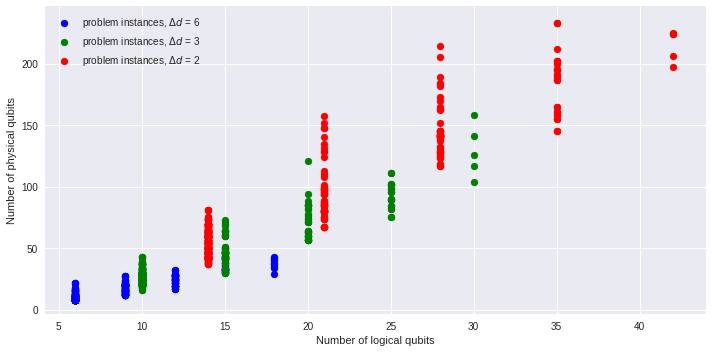

In [78]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
subset = iv[(iv.isValid==True) & (iv.delayStep==delaySteps[2])]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, c='b', label='problem instances, $\Delta d$ = %i' % delaySteps[2]);
subset = iv[(iv.isValid==True) & (iv.delayStep==delaySteps[1])]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, c='g', label='problem instances, $\Delta d$ = %i' % delaySteps[1]);
subset = iv[(iv.isValid==True) & (iv.delayStep==delaySteps[0])]
ax.scatter(subset.NLogQubits, subset.NPhysQubits, c='r', label='problem instances, $\Delta d$ = %i' % delaySteps[0]);
ax.set_xlabel('Number of logical qubits')
ax.set_ylabel('Number of physical qubits') 
ax.legend();
plt.tight_layout()
pdf = matplotlib.backends.backend_pdf.PdfPages('physicalVsLogicalNumberOfQubits.pdf');
pdf.savefig(figure=fig);
pdf.close();


## Success probability in dependence of the number of delay steps ##
The maximum delay is always 12 minutes. The delay step size is 2, 3 or 6. 

In [79]:
successProb_0 = iv[(iv.isValid==True) & (iv.delayStep==delaySteps[0])]['SuccessProbability'].dropna().values
successProb_1 = iv[(iv.isValid==True) & (iv.delayStep==delaySteps[1])]['SuccessProbability'].dropna().values
successProb_2 = iv[(iv.isValid==True) & (iv.delayStep==delaySteps[2])]['SuccessProbability'].dropna().values

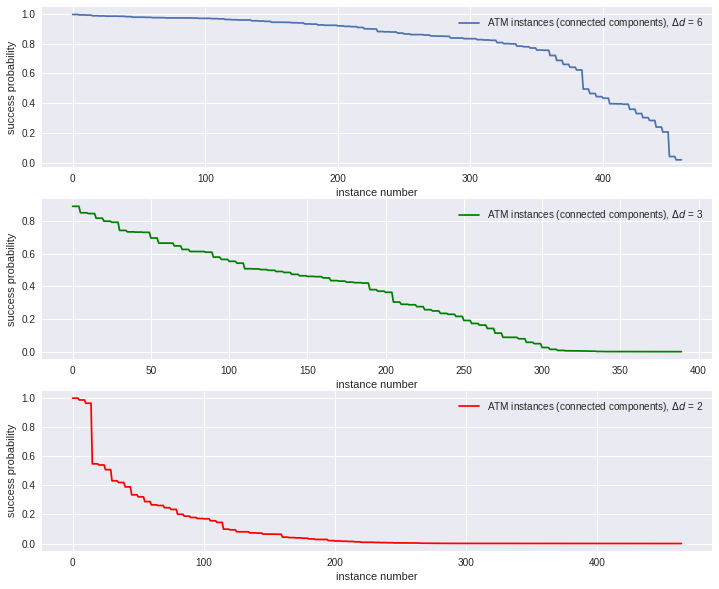

In [80]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_xlabel('instance number')
ax1.set_ylabel('success probability')

ax2 = fig.add_subplot(3, 1, 2)
ax2.set_xlabel('instance number')
ax2.set_ylabel('success probability')

ax3 = fig.add_subplot(3, 1, 3)
ax3.set_xlabel('instance number')
ax3.set_ylabel('success probability')

ax1.plot(np.flipud(np.sort(successProb_2)), label='ATM instances (connected components), $\Delta d$ = %i' % delaySteps[2]);
ax2.plot(np.flipud(np.sort(successProb_1)), c='g', label='ATM instances (connected components), $\Delta d$ = %i' % delaySteps[1]);
ax3.plot(np.flipud(np.sort(successProb_0)), c='r', label='ATM instances (connected components), $\Delta d$ = %i' % delaySteps[0]);

ax1.legend()
ax2.legend()
ax3.legend();
plt.show()

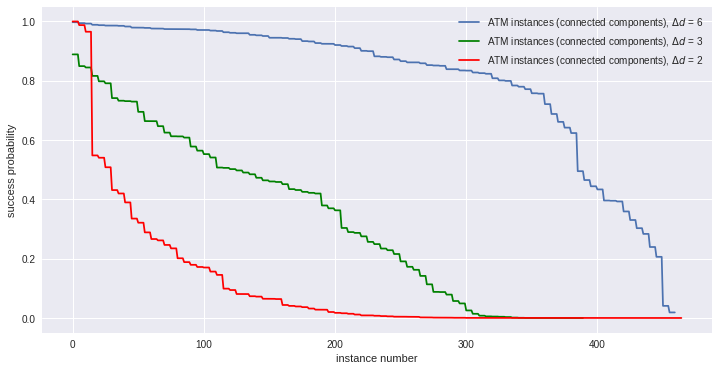

In [81]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('instance number')
ax1.set_ylabel('success probability')


ax1.plot(np.flipud(np.sort(successProb_2)), label='ATM instances (connected components), $\Delta d$ = %i' % delaySteps[2]);
ax1.plot(np.flipud(np.sort(successProb_1)), c='g', label='ATM instances (connected components), $\Delta d$ = %i' % delaySteps[1]);
ax1.plot(np.flipud(np.sort(successProb_0)), c='r', label='ATM instances (connected components), $\Delta d$ = %i' % delaySteps[0]);

ax1.legend()

plt.show()

## Success probability depending on instance parameters ##

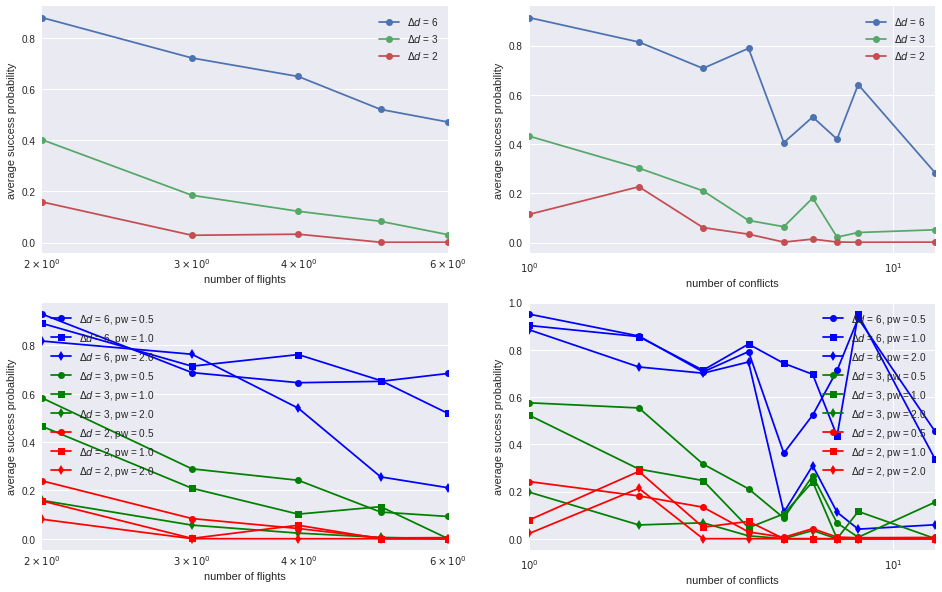

In [82]:
# vs. flights
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numFlights')['SuccessProbability'].mean()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numFlights')['SuccessProbability'].mean()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numFlights')['SuccessProbability'].mean()

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(2,2,1)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax1)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax1)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax1)

ax1.set_xscale('log')
ax1.set_ylabel('average success probability');
ax1.set_xlabel('number of flights');
ax1.legend(loc='best');

# vs. conflicts
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numConflicts')['SuccessProbability'].mean()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numConflicts')['SuccessProbability'].mean()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numConflicts')['SuccessProbability'].mean()

ax2 = fig.add_subplot(2,2,2)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax2)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax2)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax2)
ax2.set_xscale('log')
ax2.set_ylabel('average success probability');
ax2.set_xlabel('number of conflicts');
ax2.legend(loc='best');

# vs. flights, different penalty weights
d0_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[0]) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d0_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[0]) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d0_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[0]) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d1_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[1]) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d1_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[1]) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d1_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[1]) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()
d2_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[2]) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numFlights')['SuccessProbability'].mean()
d2_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[2]) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numFlights')['SuccessProbability'].mean()
d2_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[2]) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numFlights')['SuccessProbability'].mean()

ax3 = fig.add_subplot(2,2,3)
d2_pw05.plot(marker = 'o', c='b', label='$\Delta d$ = %i, pw = 0.5' % delaySteps[2], ax=ax3)
d2_pw10.plot(marker = 's', c='b', label='$\Delta d$ = %i, pw = 1.0' % delaySteps[2], ax=ax3)
d2_pw20.plot(marker = 'd', c='b', label='$\Delta d$ = %i, pw = 2.0' % delaySteps[2], ax=ax3)
d1_pw05.plot(marker = 'o', c='g', label='$\Delta d$ = %i, pw = 0.5' % delaySteps[1], ax=ax3)
d1_pw10.plot(marker = 's', c='g', label='$\Delta d$ = %i, pw = 1.0' % delaySteps[1], ax=ax3)
d1_pw20.plot(marker = 'd', c='g', label='$\Delta d$ = %i, pw = 2.0' % delaySteps[1], ax=ax3)
d0_pw05.plot(marker = 'o', c='r', label='$\Delta d$ = %i, pw = 0.5' % delaySteps[0], ax=ax3)
d0_pw10.plot(marker = 's', c='r', label='$\Delta d$ = %i, pw = 1.0' % delaySteps[0], ax=ax3)
d0_pw20.plot(marker = 'd', c='r', label='$\Delta d$ = %i, pw = 2.0' % delaySteps[0], ax=ax3)
ax3.set_xscale('log')
ax3.set_ylabel('average success probability');
ax3.set_xlabel('number of flights');
ax3.legend(loc='best');

# vs. conflicts, different penalty weights
d0_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[0]) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numConflicts')['SuccessProbability'].mean()
d0_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[0]) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numConflicts')['SuccessProbability'].mean()
d0_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[0]) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numConflicts')['SuccessProbability'].mean()
d1_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[1]) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numConflicts')['SuccessProbability'].mean()
d1_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[1]) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numConflicts')['SuccessProbability'].mean()
d1_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[1]) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numConflicts')['SuccessProbability'].mean()
d2_pw05 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[2]) & (inventoryProcessed['penalty_weight_conflict'] == 0.5)].groupby('numConflicts')['SuccessProbability'].mean()
d2_pw10 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[2]) & (inventoryProcessed['penalty_weight_conflict'] == 1.0)].groupby('numConflicts')['SuccessProbability'].mean()
d2_pw20 = inventoryProcessed[(inventoryProcessed['delayStep']==delaySteps[2]) & (inventoryProcessed['penalty_weight_conflict'] == 2.0)].groupby('numConflicts')['SuccessProbability'].mean()

ax4 = fig.add_subplot(2,2,4)
d2_pw05.plot(marker = 'o', c='b', label='$\Delta d$ = %i, pw = 0.5' % delaySteps[2], ax=ax4)
d2_pw10.plot(marker = 's', c='b', label='$\Delta d$ = %i, pw = 1.0' % delaySteps[2], ax=ax4)
d2_pw20.plot(marker = 'd', c='b', label='$\Delta d$ = %i, pw = 2.0' % delaySteps[2], ax=ax4)
d1_pw05.plot(marker = 'o', c='g', label='$\Delta d$ = %i, pw = 0.5' % delaySteps[1], ax=ax4)
d1_pw10.plot(marker = 's', c='g', label='$\Delta d$ = %i, pw = 1.0' % delaySteps[1], ax=ax4)
d1_pw20.plot(marker = 'd', c='g', label='$\Delta d$ = %i, pw = 2.0' % delaySteps[1], ax=ax4)
d0_pw05.plot(marker = 'o', c='r', label='$\Delta d$ = %i, pw = 0.5' % delaySteps[0], ax=ax4)
d0_pw10.plot(marker = 's', c='r', label='$\Delta d$ = %i, pw = 1.0' % delaySteps[0], ax=ax4)
d0_pw20.plot(marker = 'd', c='r', label='$\Delta d$ = %i, pw = 2.0' % delaySteps[0], ax=ax4)
ax4.set_xscale('log')
ax4.set_ylabel('average success probability');
ax4.set_xlabel('number of conflicts');
ax4.legend(loc='best');

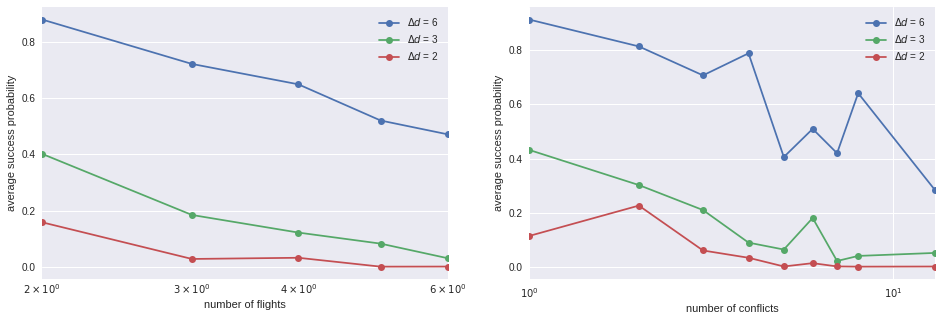

In [83]:
# vs. flights
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numFlights')['SuccessProbability'].mean()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numFlights')['SuccessProbability'].mean()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numFlights')['SuccessProbability'].mean()

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax1)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax1)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax1)
ax1.set_xscale('log')
ax1.set_ylabel('average success probability');
ax1.set_xlabel('number of flights');
ax1.legend(loc='best');

# vs. conflicts
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numConflicts')['SuccessProbability'].mean()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numConflicts')['SuccessProbability'].mean()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numConflicts')['SuccessProbability'].mean()


ax2 = fig.add_subplot(1,2,2)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax2)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax2)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax2)
ax2.set_xscale('log')
ax2.set_ylabel('average success probability');
ax2.set_xlabel('number of conflicts');
ax2.legend(loc='best');

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_success_vs_flights_and_conflicts.pdf');
pdf.savefig(figure=fig);
pdf.close();

## Maximum coefficient range ratio of embedded QUBO for different delay step sizes ##

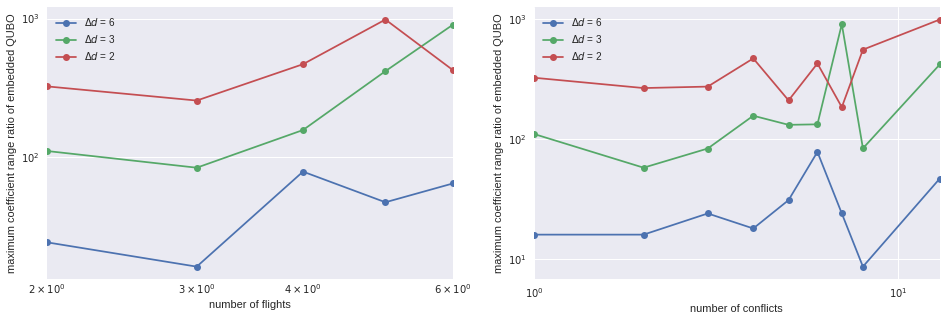

In [84]:
# vs. flights
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numFlights')['maxCoefficientRangeRatioEmbedded'].max()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numFlights')['maxCoefficientRangeRatioEmbedded'].max()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numFlights')['maxCoefficientRangeRatioEmbedded'].max()

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax1)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax1)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax1)
ax1.set_ylabel('maximum coefficient range ratio of embedded QUBO');
ax1.set_xlabel('number of flights');
ax1.legend();
ax1.set_yscale('log')
ax1.set_xscale('log')


# vs. conflicts
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numConflicts')['maxCoefficientRangeRatioEmbedded'].max()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numConflicts')['maxCoefficientRangeRatioEmbedded'].max()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numConflicts')['maxCoefficientRangeRatioEmbedded'].max()

ax2 = fig.add_subplot(1,2,2)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax2)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax2)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax2)
ax2.set_ylabel('maximum coefficient range ratio of embedded QUBO');
ax2.set_xlabel('number of conflicts');
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.legend();

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_coefficent_range_ratio_vs_flights_and_conflicts.pdf');
pdf.savefig(figure=fig);
pdf.close();

## Maximum coefficient range ratio of the QUBO before embedding ##

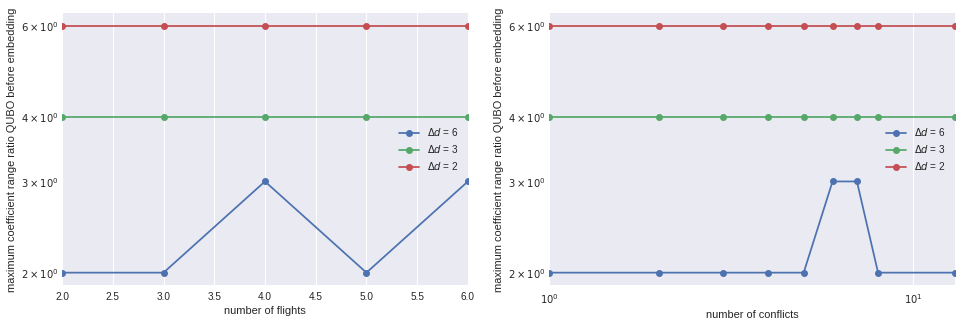

In [85]:
# vs. flights
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numFlights')['maxCoefficientRangeRatio'].max()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numFlights')['maxCoefficientRangeRatio'].max()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numFlights')['maxCoefficientRangeRatio'].max()

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax1)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax1)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax1)
#ax1.set_ylim(1.5, 6.5)
ax1.set_yscale('log')
ax1.set_ylabel('maximum coefficient range ratio QUBO before embedding');
ax1.set_xlabel('number of flights');
ax1.legend();


# vs. conflicts
d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numConflicts')['maxCoefficientRangeRatio'].max()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numConflicts')['maxCoefficientRangeRatio'].max()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numConflicts')['maxCoefficientRangeRatio'].max()

ax2 = fig.add_subplot(1,2,2)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax2)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax2)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax2)
#ax2.set_ylim(1.5, 6.5)
ax2.set_yscale('log')
ax2.set_ylabel('maximum coefficient range ratio QUBO before embedding');
ax2.set_xlabel('number of conflicts');
ax2.set_xscale('log')
ax2.legend();

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_coefficent_range_ratio_vs_flights_and_conflicts_before_embedding.pdf');
pdf.savefig(figure=fig);
pdf.close();

## Correlation of low success probability with high ratio of coefficients in the embedded QUBO ##

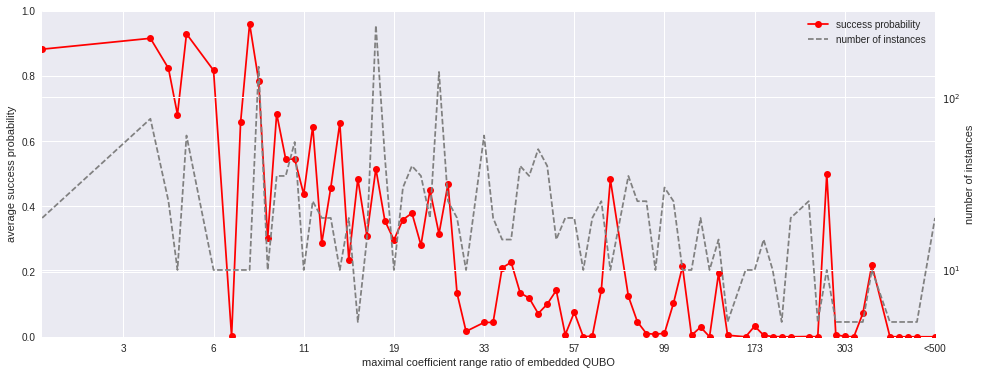

In [86]:
iv = inventoryProcessed
crr_min = iv.maxCoefficientRangeRatio.min()
crr_max = iv.maxCoefficientRangeRatio.max()
bins = np.logspace(np.log2(crr_min)+1, np.log2(500), 100, base=2)
x = iv.groupby(np.digitize(iv.maxCoefficientRangeRatioEmbedded, bins))['SuccessProbability'].mean()
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 1, 1)
x.plot(marker='o', color='r', ax=ax1, label='success probability');
ticks = range(0, 110, 10)
labels = ['<%i' % int(np.round(bins[0])) ] + [int(np.round(bins[t])) for t in ticks[1:-1]] + ['<%i' % int(np.round(bins[-1])) ] 
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels)
ax1.set_xlabel('maximal coefficient range ratio of embedded QUBO')
ax1.set_ylabel('average success probability');

y = iv.groupby(np.digitize(iv.maxCoefficientRangeRatioEmbedded, bins))['SuccessProbability'].count()
ax2 = ax1.twinx()
y.plot(linestyle='--', color='gray', ax=ax2, label='number of instances');
y.plot(linestyle='--', color='gray', ax=ax1, label='number of instances');
ax1.set_ybound(upper=1, lower=0)
ax2.set_ylabel('number of instances');
ax2.set_yscale('log')
ax1.legend(loc='upper right');

pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_success_vs_cooefficent_range_ratio.pdf');
pdf.savefig(figure=fig);
pdf.close();

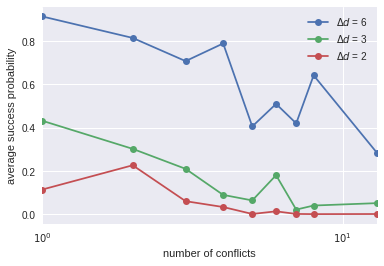

In [87]:
fig = plt.figure()

d0 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[0]].groupby('numConflicts')['SuccessProbability'].mean()
d1 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[1]].groupby('numConflicts')['SuccessProbability'].mean()
d2 = inventoryProcessed[inventoryProcessed['delayStep']==delaySteps[2]].groupby('numConflicts')['SuccessProbability'].mean()


ax2 = fig.add_subplot(1,1,1)
d2.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[2], ax=ax2)
d1.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[1], ax=ax2)
d0.plot(marker = 'o', label='$\Delta d$ = %i' % delaySteps[0], ax=ax2)
ax2.set_xscale('log')
ax2.set_ylabel('average success probability');
ax2.set_xlabel('number of conflicts');
ax2.legend(loc='best');
pdf = matplotlib.backends.backend_pdf.PdfPages('annealing_results_success_vs_conflicts.pdf');
pdf.savefig(figure=fig);
pdf.close();